# 若在[nbviewer](https://nbviewer.org/github/bomb1000/PL/blob/32529a57e09c16793193804b00c8ed26ec6a338f/02_Homework/PL_HW4/HW_4.ipynb#HW4%E9%96%8B%E5%A7%8B)瀏覽，可直接跳到[HW4 開始](#HW4開始)

# 爬取電影影評
[影評網址](https://news.agentm.tw/category/%E9%9B%BB%E5%BD%B1%E5%BD%B1%E8%A9%95/)

[程式碼解說YT連結](https://youtu.be/gKfqvbZg7yw)

- 爬取影評首頁
- 爬取影評內容 + 正則表達式做資料清洗
- 整理成dataframe 和 dict
- 輸出成 csv 和 json 檔
- jieba 斷詞
- 繪製網絡關係圖
- 創建 Class 製作module.py

![圖](movie_review.png)

## 爬取影評首頁

In [1]:
import requests
from bs4 import BeautifulSoup
import re

# Extract movie names
def extract_movie_name(title):
    # Define the regular expression pattern to capture text within 《》
    pattern = r'《(.*?)》'
    # Find all occurrences of the pattern
    movie_names = re.findall(pattern, title)
    # Return the first occurrence or None if not found
    return movie_names[0] if movie_names else None

# Define the URL
url = 'https://news.agentm.tw/category/%E9%9B%BB%E5%BD%B1%E5%BD%B1%E8%A9%95/'
content_url_list = [] # list of article content url
movie_name_list = []  # list of movie names

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.ok:
    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all <h3> tags with class 'ec-title'
    h3_tags = soup.find_all('h3', class_='ec-title')
    
    # Iterate over each <h3> tag
    for h3 in h3_tags:
        # Find <a> tag within <h3> tag
        a_tag = h3.find('a')
        
        # Extract the href (link) and title (text) from the <a> tag
        if a_tag:
            link = a_tag.get('href', '')
            content_url_list.append(link)
            title = a_tag.get('title', '')
            movie_name = extract_movie_name(title)
            movie_name_list.append(movie_name)
            print(f'Title: {title}\nLink: {link}\nMovie Name: {movie_name}\n')

else:
    print("Failed to retrieve the webpage")


Title: 【影評】《帝國浩劫：美國內戰》：與其當作商業電影，不如看作近未來醒世預言
Link: https://news.agentm.tw/278915/
Movie Name: 帝國浩劫：美國內戰

Title: 【影評】《蜘蛛驚》：熟悉的 B 級片最對味！人生還是需要點好萊塢電影台的動物災難片
Link: https://news.agentm.tw/278880/
Movie Name: 蜘蛛驚

Title: 【影評】Disney+《親愛的陌生人》：願我們都能與孤寂相擁，終能與愛相伴
Link: https://news.agentm.tw/278842/
Movie Name: 親愛的陌生人

Title: 【影評】《特技玩家》：空有獻給特技演員的殼，卻以無關又空洞的愛情戲使他們的偉大失焦
Link: https://news.agentm.tw/278732/
Movie Name: 特技玩家

Title: 【影評】《貓的報恩》: 喵不可言，荒誕可愛的奇幻冒險
Link: https://news.agentm.tw/278397/
Movie Name: 貓的報恩

Title: 【影評】《挑戰者》：精闢解構網球本質的電影，這是激情、孤獨又筋疲力竭的勝負爭鬥
Link: https://news.agentm.tw/278668/
Movie Name: 挑戰者

Title: 【影評】《邪厄恩典》：驚悚感與社會議題貼合，一鳴驚人的劇情長片
Link: https://news.agentm.tw/278735/
Movie Name: 邪厄恩典

Title: 【影評】Netflix 漫改電影《城市獵人》：出乎意料的高還原度，致敬黃金年代的不敗神作
Link: https://news.agentm.tw/278577/
Movie Name: 城市獵人

Title: 【影評】《帝國浩劫：美國內戰》: 這未必是你期望的戰爭風景，但這是來自記者之眼的真實戰爭影像
Link: https://news.agentm.tw/278535/
Movie Name: 帝國浩劫：美國內戰

Title: 【影評】《挑戰者》：這是一場三角戀沒錯，但卻很可能與你想像不同，不僅性感，甚至還峰迴路轉
Link: https://news.agentm.tw/2

## 爬取影評內容 + 正則表達式做資料清洗

In [2]:
import requests
from bs4 import BeautifulSoup
import re

# Assuming `urls` is a list of URLs to crawl into, which you obtained from the previous scrape
urls = content_url_list  # Replace with actual URLs


# Extract movie names
def extract_movie_name(title):
    # Define the regular expression pattern to capture text within 《》
    pattern = r'《(.*?)》'
    # Find all occurrences of the pattern
    movie_names = re.findall(pattern, title)
    # Return the first occurrence or None if not found
    return movie_names[0] if movie_names else None

# Srape the article data
def scrape_article_data(article_url):
    response = requests.get(article_url)
    if response.ok:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the article content within div class="post"
        post_div = soup.find('div', class_='post')
        content = ''

        if post_div:
            for elem in post_div.find_all(['p', 'h2']):  # Get all p and h2 tags within div
                content += elem.get_text().strip() + ' '
        
        # Get rid off English and numbers in the content (正則表達式資料清洗)
        content = re.sub(r'[A-Za-z0-9]', '', content)

        # Extract the author's name
        author_tag = soup.find('a', class_='ec-author')
        author_name = author_tag.get_text().strip() if author_tag else "Author not found"

        # Extract the publish date
        publish_date_tag = soup.find('time')
        publish_date = publish_date_tag.get_text().strip() if publish_date_tag else "Date not found"


        return {
            'url': article_url,
            'content': content,
            'author_name': author_name,
            'publish_date': publish_date
        }
    else:
        print(f"Failed to retrieve the article from {article_url}")
        return None



# Iterate over URLs and scrape content from each

for url in urls:
    article_data = scrape_article_data(url)
    print(article_data)
    break


{'url': 'https://news.agentm.tw/278915/', 'content': '這個星球上有一個國家，過去六十年以來參加過超過六十場戰爭，幾乎遍布五大洲七大洋每個角落。即便有些不是直接派兵參戰，也會給予軍火援助或是戰略指導。而無論是主動投入或被動牽連，這些戰火從來沒有波及他們的本土，甚至連國境邊界都沒有碰到。是的，你沒猜錯，就是位於北美洲的美國。 《帝國浩劫：美國內戰》預告  內容目錄 《帝國浩劫：美國內戰》劇情概述、主創團隊及主要卡司 《帝國浩劫：美國內戰》( ) 是《 天毀滅倒數》《 週毀列倒數：全境擴散》《太陽浩劫》《人造意識》的導演亞力克斯嘉蘭身兼編導的最新作品，也是他與獨立片商「」第二度合作。 故事講述在不久的將來，某任美國總統不僅違憲自行宣布連任第三任期，還解散了包含聯邦調查局在內的幾個內控機構，嚴重破壞憲政體制的倒行逆施，引起國內民眾群情激憤紛起抗議，最終演變為中部、西部、東部各有數州宣稱脫離聯邦獨立，並集結軍隊向華盛頓特區進軍。由幾名記者組成的採訪隊，決定趁總統最後在位期間進行當面採訪，他們一路自紐約北上往前線進發，沿路所見不僅光怪陸離，也成了其中某幾位人生最後的光景。 主要卡司有：克絲汀鄧斯特飾演的資深戰地記者「李」，華格納莫拉飾演的文字記者「喬」，史蒂芬麥金利亨德森飾演的老牌政治記者「薩米」，卡莉史派妮飾演的菜鳥攝影師「潔西」。而鄧斯特的先生傑西普萊蒙也在片中客串了一名抱有極端民粹思想的地方民兵。全片預算為五千萬美金（約合台幣一點六億），截稿為止的全球票房累積為八千九百萬美元，應該有機會達成損益平衡。  ※以下內容可能包含劇透、成人議題以及個人主觀論述，請斟酌閱覽 彷如魔幻的內戰預言 《帝國浩劫：美國內戰》原片名「 」可直譯為「內戰」，對美國人或熟悉美國建國歷史的外人來說，這個名詞也可以專指十九世紀後半、那場打了四年的美國南北戰爭。而主創嘉蘭之所以選用這個名詞，事實上也是在凸顯故事要強調的美國內部紛爭，頗有一種「我先說了這個預言，那麼注定發生的魔咒就被破除了」的念願。片中那位只在開頭和結尾出場的美國總統，雖然刻意隱去姓名，不過從那頭紅金髮色、下撇嘴角、和大腹便便的體態，所指何人根本不言可喻。  嘉蘭早就是主流商業類型的老手，但這次卻刻意將一部公路類型的大型投資拍得不那麼主流，甚至有部分場面呈現的相當抽離，以致全片想展現

# 整理成dataframe 和 dict

In [3]:
import pandas as pd

# Assuming `article_data_list` is a list of dictionaries containing the scraped data for each article
article_data_list = [
    scrape_article_data(url) for url in urls  # Replace `urls` with your list of article URLs
]

# Create a DataFrame from the list of article data
df = pd.DataFrame(article_data_list)
df.insert(1, 'movie_name', movie_name_list)
# df['movie_name'] = movie_name_list

display(df.head(5))

,url,movie_name,content,author_name,publish_date
0,https://news.agentm.tw/278915/,帝國浩劫：美國內戰,這個星球上有一個國家，過去六十年以來參加過超過六十場戰爭，幾乎遍布五大洲七大洋每個角落。即便...,潘光中,2024-05-03
1,https://news.agentm.tw/278880/,蜘蛛驚,於 金馬奇幻影展首映的《蜘蛛驚》，為繼《食人蛛 》、《八腳怪》、《天蛛地滅》後，又一部巨型...,愛看電影的波妞,2024-05-03
2,https://news.agentm.tw/278842/,親愛的陌生人,《親愛的陌生人》改編自山田太一的小說《與幽靈共度的夏天》，近期上架 +，這是繼大林宣彥的《與...,艾米希莉 Amesily,2024-05-02
3,https://news.agentm.tw/278732/,特技玩家,由大衛雷奇執導，萊恩葛斯林以及艾蜜莉布朗所主演的《特技玩家》，如其名，是一部以特技演員為主角...,影Joy Movie,2024-05-02
4,https://news.agentm.tw/278397/,貓的報恩,若談到最喜歡的吉卜力動畫，《貓的報恩》應該是一部鮮少被提及的作品，但就我問過的觀眾來說，還沒...,電影神搜,2024-04-30


In [4]:
dict = df.to_dict()
# print(dict)

##　輸出成 csv 和 json 檔

In [5]:
# Export the DataFrame to a CSV file
csv_filename = 'data/articles.csv'
df.to_csv(csv_filename, index=False, encoding='utf-8-sig')

# Export the DataFrame to a JSON file
json_filename = 'data/articles.json'
df.to_json(json_filename, orient='records', force_ascii=False)

print(f"Data exported to {csv_filename} and {json_filename}")


Data exported to data/articles.csv and data/articles.json


## 從 Google Sheet 讀取資料

In [6]:
import pandas as pd

# 使用修改後的連結
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1ali-GpQxQHX4TjbYHRpkUuWkmh6yTihokdUu_7HJSvc/export?format=csv&gid=229672518'
df = pd.read_csv(google_sheet_url)
display(df)


,url,movie_name,content,author_name,publish_date
0,https://news.agentm.tw/277749/,活個精彩,《活個精彩》是一部由凱文哈特、布萊恩克蘭斯頓、妮可基嫚等人主演的勵志片，也是以真實故事為基礎...,影Joy Movie,2024-04-17
1,https://news.agentm.tw/277359/,冰室蓮司：日本統一 台灣篇,《日本統一》為日本廣受歡迎的長壽黑幫影劇系列作，自 年推出至今累積作品超過 部，不只連續...,電影神搜,2024-04-16
2,https://news.agentm.tw/277642/,雙面女弒親案,出品很多犯罪紀錄片、犯罪影集等等，往往都是排行榜上的亮眼作品，於 月 日上線的紀錄片《雙...,愛看電影的波妞,2024-04-16
3,https://news.agentm.tw/277429/,非紳士特攻隊,距離《絕地營救》僅僅一年，蓋瑞奇導演又帶著新片《非紳士特攻隊》回來了。這是一部諜報電影、劫盜...,龍貓大王通信,2024-04-16
4,https://news.agentm.tw/277536/,皇室醜聞夜,改編自真實事件的《皇室醜聞夜》講述 《新聞之夜》如何爭取到與安德魯王子的獨家採訪，揭露安德魯...,艾米希莉 Amesily,2024-04-15
5,https://news.agentm.tw/277463/,眼淚工匠,《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋...,艾米希莉 Amesily,2024-04-12
6,https://news.agentm.tw/277440/,禁忌之慾,由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,人文電影的追尋,2024-04-12
7,https://news.agentm.tw/277236/,搬家,導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,龍貓大王通信,2024-04-10
8,https://news.agentm.tw/277248/,功夫熊貓4,年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習武功成為神...,影Joy Movie,2024-04-10
9,https://news.agentm.tw/277226/,SISU：黃金硬漢,如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在 上架的芬蘭電...,Thelma 電影狂花,2024-04-10


In [7]:
# ! pip install jieba

## jieba 斷詞

In [8]:
import jieba
import jieba.analyse

def extract_keywords(text):
    return jieba.analyse.extract_tags(text, topK=10) #提取前十個關鍵字

#創建一個新欄位keywords存放intro資料使用extract_keywords這個functionc後的結果
df['keywords'] = df['content'].apply(extract_keywords)
df.head(10)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\micha\AppData\Local\Temp\jieba.cache
Loading model cost 0.605 seconds.
Prefix dict has been built successfully.


,url,movie_name,content,author_name,publish_date,keywords
0,https://news.agentm.tw/277749/,活個精彩,《活個精彩》是一部由凱文哈特、布萊恩克蘭斯頓、妮可基嫚等人主演的勵志片，也是以真實故事為基礎...,影Joy Movie,2024-04-17,"[活個, 電影, 凱文, 精彩, 哈特, 看護, 表現, 角色, 這個, 一個]"
1,https://news.agentm.tw/277359/,冰室蓮司：日本統一 台灣篇,《日本統一》為日本廣受歡迎的長壽黑幫影劇系列作，自 年推出至今累積作品超過 部，不只連續...,電影神搜,2024-04-16,"[台灣, 冰室, 統一, 本片, 日本, 台灣篇, 觀眾, 蓮司, 電影, 黑道]"
2,https://news.agentm.tw/277642/,雙面女弒親案,出品很多犯罪紀錄片、犯罪影集等等，往往都是排行榜上的亮眼作品，於 月 日上線的紀錄片《雙...,愛看電影的波妞,2024-04-16,"[珍妮佛, 雙面, 親案, 紀錄片, 犯罪, 事件, 過程, 真相, 父母, 抽絲]"
3,https://news.agentm.tw/277429/,非紳士特攻隊,距離《絕地營救》僅僅一年，蓋瑞奇導演又帶著新片《非紳士特攻隊》回來了。這是一部諜報電影、劫盜...,龍貓大王通信,2024-04-16,"[士特, 電影, 非紳, 攻隊, 蓋瑞奇, 他們, 納粹, 任務, 戰爭, 英國]"
4,https://news.agentm.tw/277536/,皇室醜聞夜,改編自真實事件的《皇室醜聞夜》講述 《新聞之夜》如何爭取到與安德魯王子的獨家採訪，揭露安德魯...,艾米希莉 Amesily,2024-04-15,"[醜聞夜, 皇室, 安德魯, 新聞, 王子, 真實, 訪談, 事件, 採訪, 節目]"
5,https://news.agentm.tw/277463/,眼淚工匠,《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋...,艾米希莉 Amesily,2024-04-12,"[眼淚, 工匠, 瑞吉爾, 暮光, 之城, 劇情, 愛情, 創傷, 擁有, 孤兒院]"
6,https://news.agentm.tw/277440/,禁忌之慾,由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,人文電影的追尋,2024-04-12,"[克斯, 兩人, 愛的, 電影, 歐嘉, 瑪雅, 職業, 我們, 他們, 設定]"
7,https://news.agentm.tw/277236/,搬家,導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,龍貓大王通信,2024-04-10,"[蓮子, 搬家, 電影, 這個, 相米, 離婚, 智子, 導演, 因為, 一個]"
8,https://news.agentm.tw/277248/,功夫熊貓4,年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習武功成為神...,影Joy Movie,2024-04-10,"[阿波, 熊貓, 功夫, 反派, 並且, 三部曲, 生涯, 第二集, 神龍大俠, 還是]"
9,https://news.agentm.tw/277226/,SISU：黃金硬漢,如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在 上架的芬蘭電...,Thelma 電影狂花,2024-04-10,"[金硬漢, 電影, 本片, 科夏伊, 一個, 主角, 殺神, 這類, 設計, 劇情]"


## 繪製網絡關係圖

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [10]:
G = nx.Graph()

for index, row in df.iterrows():
    movie_name = row['movie_name']
    keywords = row['keywords']

    G.add_node(movie_name, type='author')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(movie_name, keyword)

In [11]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

C:\Users\micha\anaconda3\envs\webcrawling\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


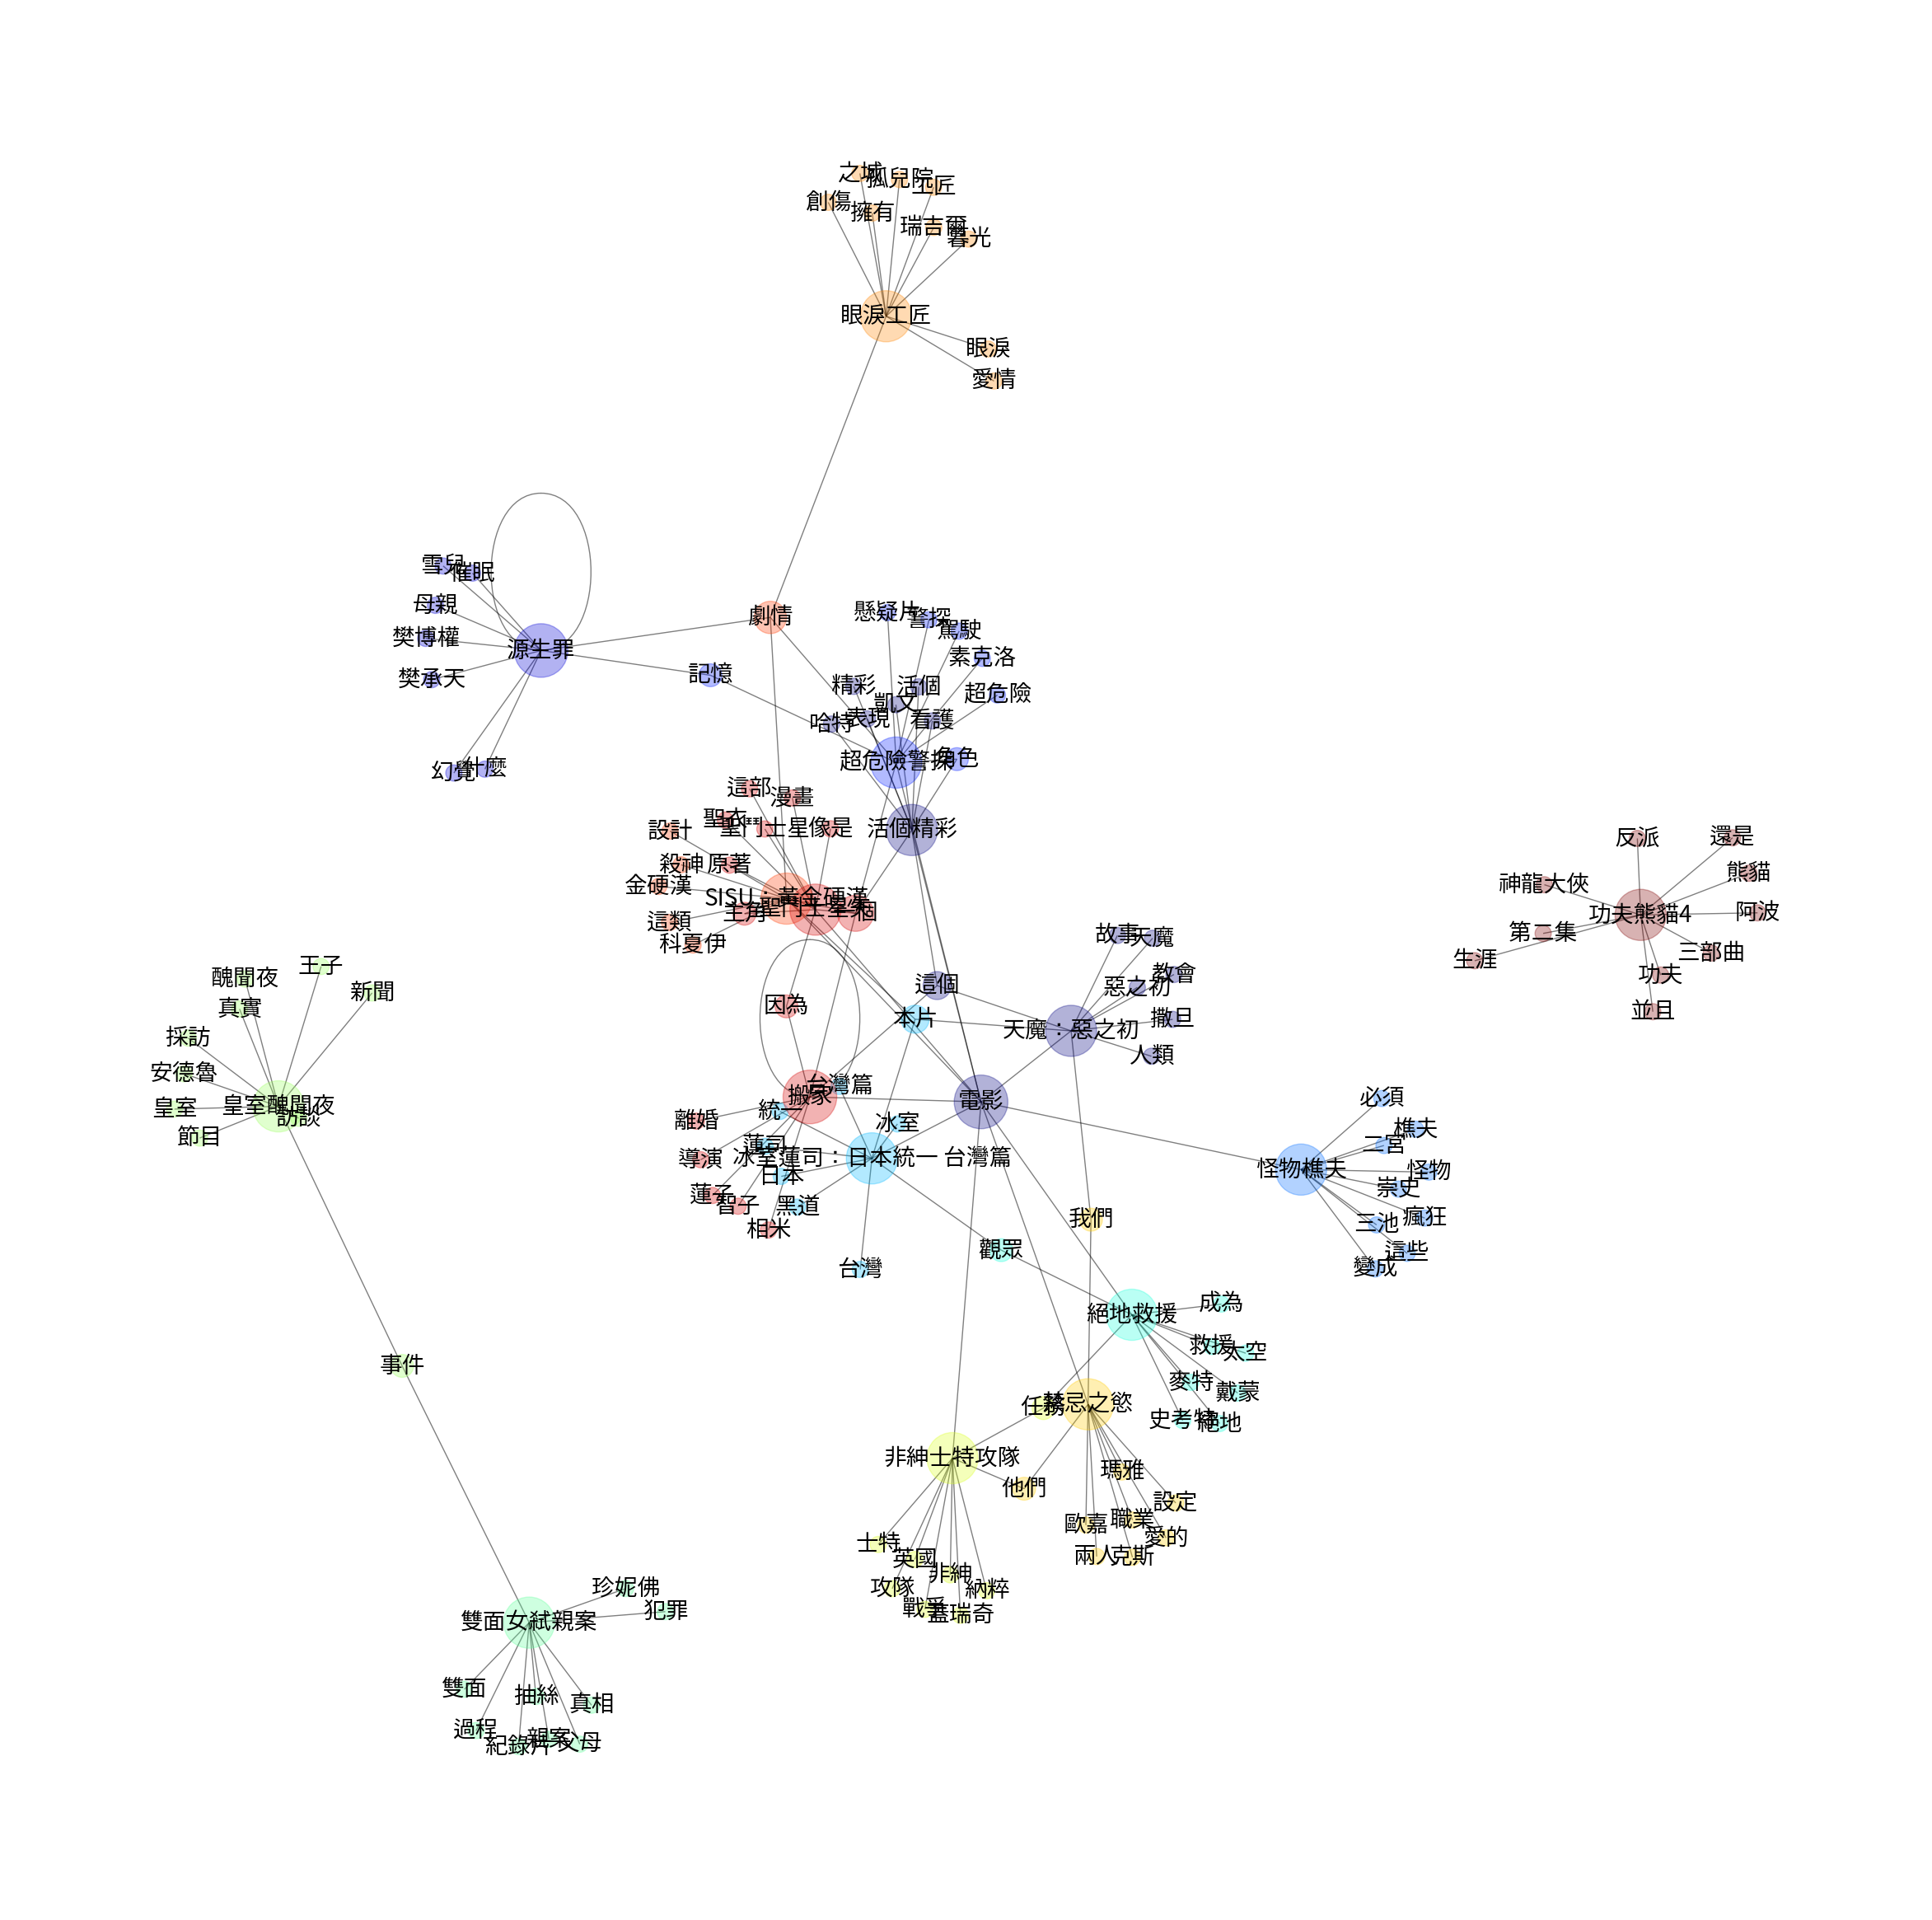

In [12]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()

## 製作模組 >> [module.py](https://github.com/bomb1000/PL/blob/main/02_Homework/PL_HW3/module.py)
## 使用模組 >> [test_module](https://github.com/bomb1000/PL/blob/main/02_Homework/PL_HW3/test_module.ipynb)

<br><br><br><br><br>

<a id = 'HW4開始'> </a>
# HW4 開始

# LLM 摘要

In [13]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

def bert_summarize(text):
    # 檢測是否有可用的GPU，如果有，使用第一個GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 載入分詞器和模型
    tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm')
    model = BertForMaskedLM.from_pretrained('hfl/chinese-bert-wwm')

    # 將模型轉移到GPU
    model.to(device)

    # 處理輸入資料
    inputs = tokenizer(text, return_tensors="pt", max_length=100, truncation=True)
    
    # 將輸入資料也轉移到GPU
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # 在GPU上生成摘要
    summary_ids = model.generate(inputs['input_ids'], max_length=128)

    # 解碼生成的摘要
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# # 示例文本
# text = "這是一個測試文本。"
# summary = bert_summarize(text)
# print(summary)


In [14]:
text = df['content'][0]
summary = bert_summarize(text)
print(summary)

Using device: cuda


C:\Users\micha\anaconda3\envs\webcrawling\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly ident

《 活 個 精 彩 》 是 一 部 由 凱 文 哈 特 、 布 萊 恩 克 蘭 斯 頓 、 妮 可 基 嫚 等 人 主 演 的 勵 志 片 ， 也 是 以 真 實 故 事 為 基 礎 ， 並 且 翻 拍 自 年 的 法 國 電 影 《 逆 轉 人 生 》 ， 故 事 敘 述 布 萊 恩 克 蘭 斯 頓 飾 演 的 億 萬 富 翁 在 一 次 意 外 中 造 成 癱 瘓 ， 居 家 生 活 。 等 等 等 。 等 等 等 。 等 。 等 。 等 。 等 。 等 。 等 。 等 。 等 。 等 。 等


In [15]:
l = []
for i in range(len(df['content'])):
    sum = bert_summarize(df['content'][i])
    l.append(sum)

Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda


Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
df['summarization'] = l
df['summarization']

0     《 活 個 精 彩 》 是 一 部 由 凱 文 哈 特 、 布 萊 恩 克 蘭 斯 頓 、 ...
1     《 日 本 統 一 》 為 日 本 廣 受 歡 迎 的 長 壽 黑 幫 影 劇 系 列 作 ...
2     出 品 很 多 犯 罪 紀 錄 片 、 犯 罪 影 集 等 等 ， 往 往 都 是 排 行 ...
3     距 離 《 絕 地 營 救 》 僅 僅 一 年 ， 蓋 瑞 奇 導 演 又 帶 著 新 片 ...
4     改 編 自 真 實 事 件 的 《 皇 室 醜 聞 夜 》 講 述 《 新 聞 之 夜 》 ...
5     《 眼 淚 工 匠 》 改 編 自 義 大 利 作 家 艾 琳 杜 奧 姆 的 同 名 暢 ...
6     由 波 蘭 導 演 湯 瑪 茲 曼 德 斯 執 導 的 《 禁 忌 之 慾 》 ， 劇 情 ...
7     導 演 相 米 慎 二 應 該 仍 然 保 有 日 本 影 史 的 一 個 小 紀 錄 ： ...
8     年 ， 由 夢 工 廠 製 作 與 發 行 的 動 畫 片 《 功 夫 熊 貓 》 ， 以 ...
9     如 今 要 當 個 殺 神 ， 光 只 是 對 付 黑 幫 還 不 夠 ， 你 還 得 要 ...
10    構 思 經 典 電 影 的 前 傳 故 事 ， 往 往 是 吃 力 不 討 好 的 任 務 ...
11    羅 素 克 洛 主 演 的 懸 疑 片 《 超 危 險 警 探 》 於 近 日 上 映 ， ...
12    命 案 、 催 眠 、 隱 瞞 、 幻 覺 《 源 生 罪 》 以 催 眠 貫 穿 全 劇 ...
13    三 池 崇 史 ， 應 該 是 日 本 最 喜 愛 精 神 病 態 主 題 的 導 演 。 ...
14    撇 開 我 們 先 前 聽 到 的 種 種 評 論 ， 假 設 你 的 親 友 完 全 不 ...
15    由 雷 利 史 考 特 執 導 ， 年 上 映 的 《 絕 地 救 援 》 已 經 成 為 ...
Name: summarization, dtype: object

In [17]:
def remove_spaces(text):
    # 使用 replace 方法來刪除空格
    return text.replace(" ", "")

In [18]:
df['summarization'] = df['summarization'].apply(remove_spaces)
display(df)

,url,movie_name,content,author_name,publish_date,keywords,summarization
0,https://news.agentm.tw/277749/,活個精彩,《活個精彩》是一部由凱文哈特、布萊恩克蘭斯頓、妮可基嫚等人主演的勵志片，也是以真實故事為基礎...,影Joy Movie,2024-04-17,"[活個, 電影, 凱文, 精彩, 哈特, 看護, 表現, 角色, 這個, 一個]",《活個精彩》是一部由凱文哈特、布萊恩克蘭斯頓、妮可基嫚等人主演的勵志片，也是以真實故事為基礎...
1,https://news.agentm.tw/277359/,冰室蓮司：日本統一 台灣篇,《日本統一》為日本廣受歡迎的長壽黑幫影劇系列作，自 年推出至今累積作品超過 部，不只連續...,電影神搜,2024-04-16,"[台灣, 冰室, 統一, 本片, 日本, 台灣篇, 觀眾, 蓮司, 電影, 黑道]",《日本統一》為日本廣受歡迎的長壽黑幫影劇系列作，自年推出至今累積作品超過部，不只連續劇一部接...
2,https://news.agentm.tw/277642/,雙面女弒親案,出品很多犯罪紀錄片、犯罪影集等等，往往都是排行榜上的亮眼作品，於 月 日上線的紀錄片《雙...,愛看電影的波妞,2024-04-16,"[珍妮佛, 雙面, 親案, 紀錄片, 犯罪, 事件, 過程, 真相, 父母, 抽絲]",出品很多犯罪紀錄片、犯罪影集等等，往往都是排行榜上的亮眼作品，於月日上線的紀錄片《雙面女弑親...
3,https://news.agentm.tw/277429/,非紳士特攻隊,距離《絕地營救》僅僅一年，蓋瑞奇導演又帶著新片《非紳士特攻隊》回來了。這是一部諜報電影、劫盜...,龍貓大王通信,2024-04-16,"[士特, 電影, 非紳, 攻隊, 蓋瑞奇, 他們, 納粹, 任務, 戰爭, 英國]",距離《絕地營救》僅僅一年，蓋瑞奇導演又帶著新片《非紳士特攻隊》回來了。這是一部諜報電影、劫盜...
4,https://news.agentm.tw/277536/,皇室醜聞夜,改編自真實事件的《皇室醜聞夜》講述 《新聞之夜》如何爭取到與安德魯王子的獨家採訪，揭露安德魯...,艾米希莉 Amesily,2024-04-15,"[醜聞夜, 皇室, 安德魯, 新聞, 王子, 真實, 訪談, 事件, 採訪, 節目]",改編自真實事件的《皇室醜聞夜》講述《新聞之夜》如何爭取到與安德魯王子的獨家採訪，揭露安德魯王...
5,https://news.agentm.tw/277463/,眼淚工匠,《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋...,艾米希莉 Amesily,2024-04-12,"[眼淚, 工匠, 瑞吉爾, 暮光, 之城, 劇情, 愛情, 創傷, 擁有, 孤兒院]",《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋...
6,https://news.agentm.tw/277440/,禁忌之慾,由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,人文電影的追尋,2024-04-12,"[克斯, 兩人, 愛的, 電影, 歐嘉, 瑪雅, 職業, 我們, 他們, 設定]",由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...
7,https://news.agentm.tw/277236/,搬家,導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,龍貓大王通信,2024-04-10,"[蓮子, 搬家, 電影, 這個, 相米, 離婚, 智子, 導演, 因為, 一個]",導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...
8,https://news.agentm.tw/277248/,功夫熊貓4,年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習武功成為神...,影Joy Movie,2024-04-10,"[阿波, 熊貓, 功夫, 反派, 並且, 三部曲, 生涯, 第二集, 神龍大俠, 還是]",年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習武功成為神...
9,https://news.agentm.tw/277226/,SISU：黃金硬漢,如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在 上架的芬蘭電...,Thelma 電影狂花,2024-04-10,"[金硬漢, 電影, 本片, 科夏伊, 一個, 主角, 殺神, 這類, 設計, 劇情]",如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在上架的芬蘭電影《...


In [19]:
# df['keywords_sumrz']

## 對LLM摘要做斷詞

In [20]:
# df['keywords_sumrz'] = df['summarization'].apply(remove_spaces)
df['keywords_sumrz'] = df['summarization'].apply(extract_keywords)
df.head(10)

,url,movie_name,content,author_name,publish_date,keywords,summarization,keywords_sumrz
0,https://news.agentm.tw/277749/,活個精彩,《活個精彩》是一部由凱文哈特、布萊恩克蘭斯頓、妮可基嫚等人主演的勵志片，也是以真實故事為基礎...,影Joy Movie,2024-04-17,"[活個, 電影, 凱文, 精彩, 哈特, 看護, 表現, 角色, 這個, 一個]",《活個精彩》是一部由凱文哈特、布萊恩克蘭斯頓、妮可基嫚等人主演的勵志片，也是以真實故事為基礎...,"[恩克, 布萊, 蘭斯頓, 妮可, 故事, 活個, 由凱文, 基嫚, 勵志片, 真實]"
1,https://news.agentm.tw/277359/,冰室蓮司：日本統一 台灣篇,《日本統一》為日本廣受歡迎的長壽黑幫影劇系列作，自 年推出至今累積作品超過 部，不只連續...,電影神搜,2024-04-16,"[台灣, 冰室, 統一, 本片, 日本, 台灣篇, 觀眾, 蓮司, 電影, 黑道]",《日本統一》為日本廣受歡迎的長壽黑幫影劇系列作，自年推出至今累積作品超過部，不只連續劇一部接...,"[統一, tbs, 冰室, 日本, 系列, 一部, 廣受, 歡迎, 黑幫, 影劇]"
2,https://news.agentm.tw/277642/,雙面女弒親案,出品很多犯罪紀錄片、犯罪影集等等，往往都是排行榜上的亮眼作品，於 月 日上線的紀錄片《雙...,愛看電影的波妞,2024-04-16,"[珍妮佛, 雙面, 親案, 紀錄片, 犯罪, 事件, 過程, 真相, 父母, 抽絲]",出品很多犯罪紀錄片、犯罪影集等等，往往都是排行榜上的亮眼作品，於月日上線的紀錄片《雙面女弑親...,"[紀錄片, 雙面, 親案, 犯罪, 影集, 上線, 幾天, 經躍升, 熱門, 前十]"
3,https://news.agentm.tw/277429/,非紳士特攻隊,距離《絕地營救》僅僅一年，蓋瑞奇導演又帶著新片《非紳士特攻隊》回來了。這是一部諜報電影、劫盜...,龍貓大王通信,2024-04-16,"[士特, 電影, 非紳, 攻隊, 蓋瑞奇, 他們, 納粹, 任務, 戰爭, 英國]",距離《絕地營救》僅僅一年，蓋瑞奇導演又帶著新片《非紳士特攻隊》回來了。這是一部諜報電影、劫盜...,"[電影, 絕地, 營救, 戰爭, 士特, 一部, 距離, 僅僅, 蓋瑞奇, 導演]"
4,https://news.agentm.tw/277536/,皇室醜聞夜,改編自真實事件的《皇室醜聞夜》講述 《新聞之夜》如何爭取到與安德魯王子的獨家採訪，揭露安德魯...,艾米希莉 Amesily,2024-04-15,"[醜聞夜, 皇室, 安德魯, 新聞, 王子, 真實, 訪談, 事件, 採訪, 節目]",改編自真實事件的《皇室醜聞夜》講述《新聞之夜》如何爭取到與安德魯王子的獨家採訪，揭露安德魯王...,"[新聞, 安德魯, 王子, 菲力普, 本片, 改編, 自真實, 醜聞夜, 講述, 爭取]"
5,https://news.agentm.tw/277463/,眼淚工匠,《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋...,艾米希莉 Amesily,2024-04-12,"[眼淚, 工匠, 瑞吉爾, 暮光, 之城, 劇情, 愛情, 創傷, 擁有, 孤兒院]",《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋...,"[眼淚, 改編, 自義, 艾琳, 杜奧姆, 暢銷, 結婚, 那麼, 導演亞, 歷山]"
6,https://news.agentm.tw/277440/,禁忌之慾,由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,人文電影的追尋,2024-04-12,"[克斯, 兩人, 愛的, 電影, 歐嘉, 瑪雅, 職業, 我們, 他們, 設定]",由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,"[女法官, 奉公守法, 波蘭導演, 湯瑪茲曼, 執導, 劇情, 歐嘉, 遇見, 小歲, 跳傘]"
7,https://news.agentm.tw/277236/,搬家,導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,龍貓大王通信,2024-04-10,"[蓮子, 搬家, 電影, 這個, 相米, 離婚, 智子, 導演, 因為, 一個]",導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,"[導演, 新人, 相米, 慎二應, 影史, 一個, 小紀錄, 獲得, 當年, 著相米]"
8,https://news.agentm.tw/277248/,功夫熊貓4,年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習武功成為神...,影Joy Movie,2024-04-10,"[阿波, 熊貓, 功夫, 反派, 並且, 三部曲, 生涯, 第二集, 神龍大俠, 還是]",年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習武功成為神...,"[熊貓, 片商, 由夢工, 以古, 中國作, 學習, 成為, 神龍大俠, 風格, 廣受]"
9,https://news.agentm.tw/277226/,SISU：黃金硬漢,如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在 上架的芬蘭電...,Thelma 電影狂花,2024-04-10,"[金硬漢, 電影, 本片, 科夏伊, 一個, 主角, 殺神, 這類, 設計, 劇情]",如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在上架的芬蘭電影《...,"[電影, 金硬漢, 人類, 平凡, 一部, 當個, 殺神, 對付, 黑幫, 還不夠]"


## 對LLM摘要斷詞繪製網絡關聯圖

In [21]:
G = nx.Graph()

for index, row in df.iterrows():
    movie_name = row['movie_name']
    keywords_sumrz = row['keywords_sumrz']

    G.add_node(movie_name, type='author')

    for keyword in keywords_sumrz:
        G.add_node(keyword, type='keyword')
        G.add_edge(movie_name, keyword)

C:\Users\micha\anaconda3\envs\webcrawling\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


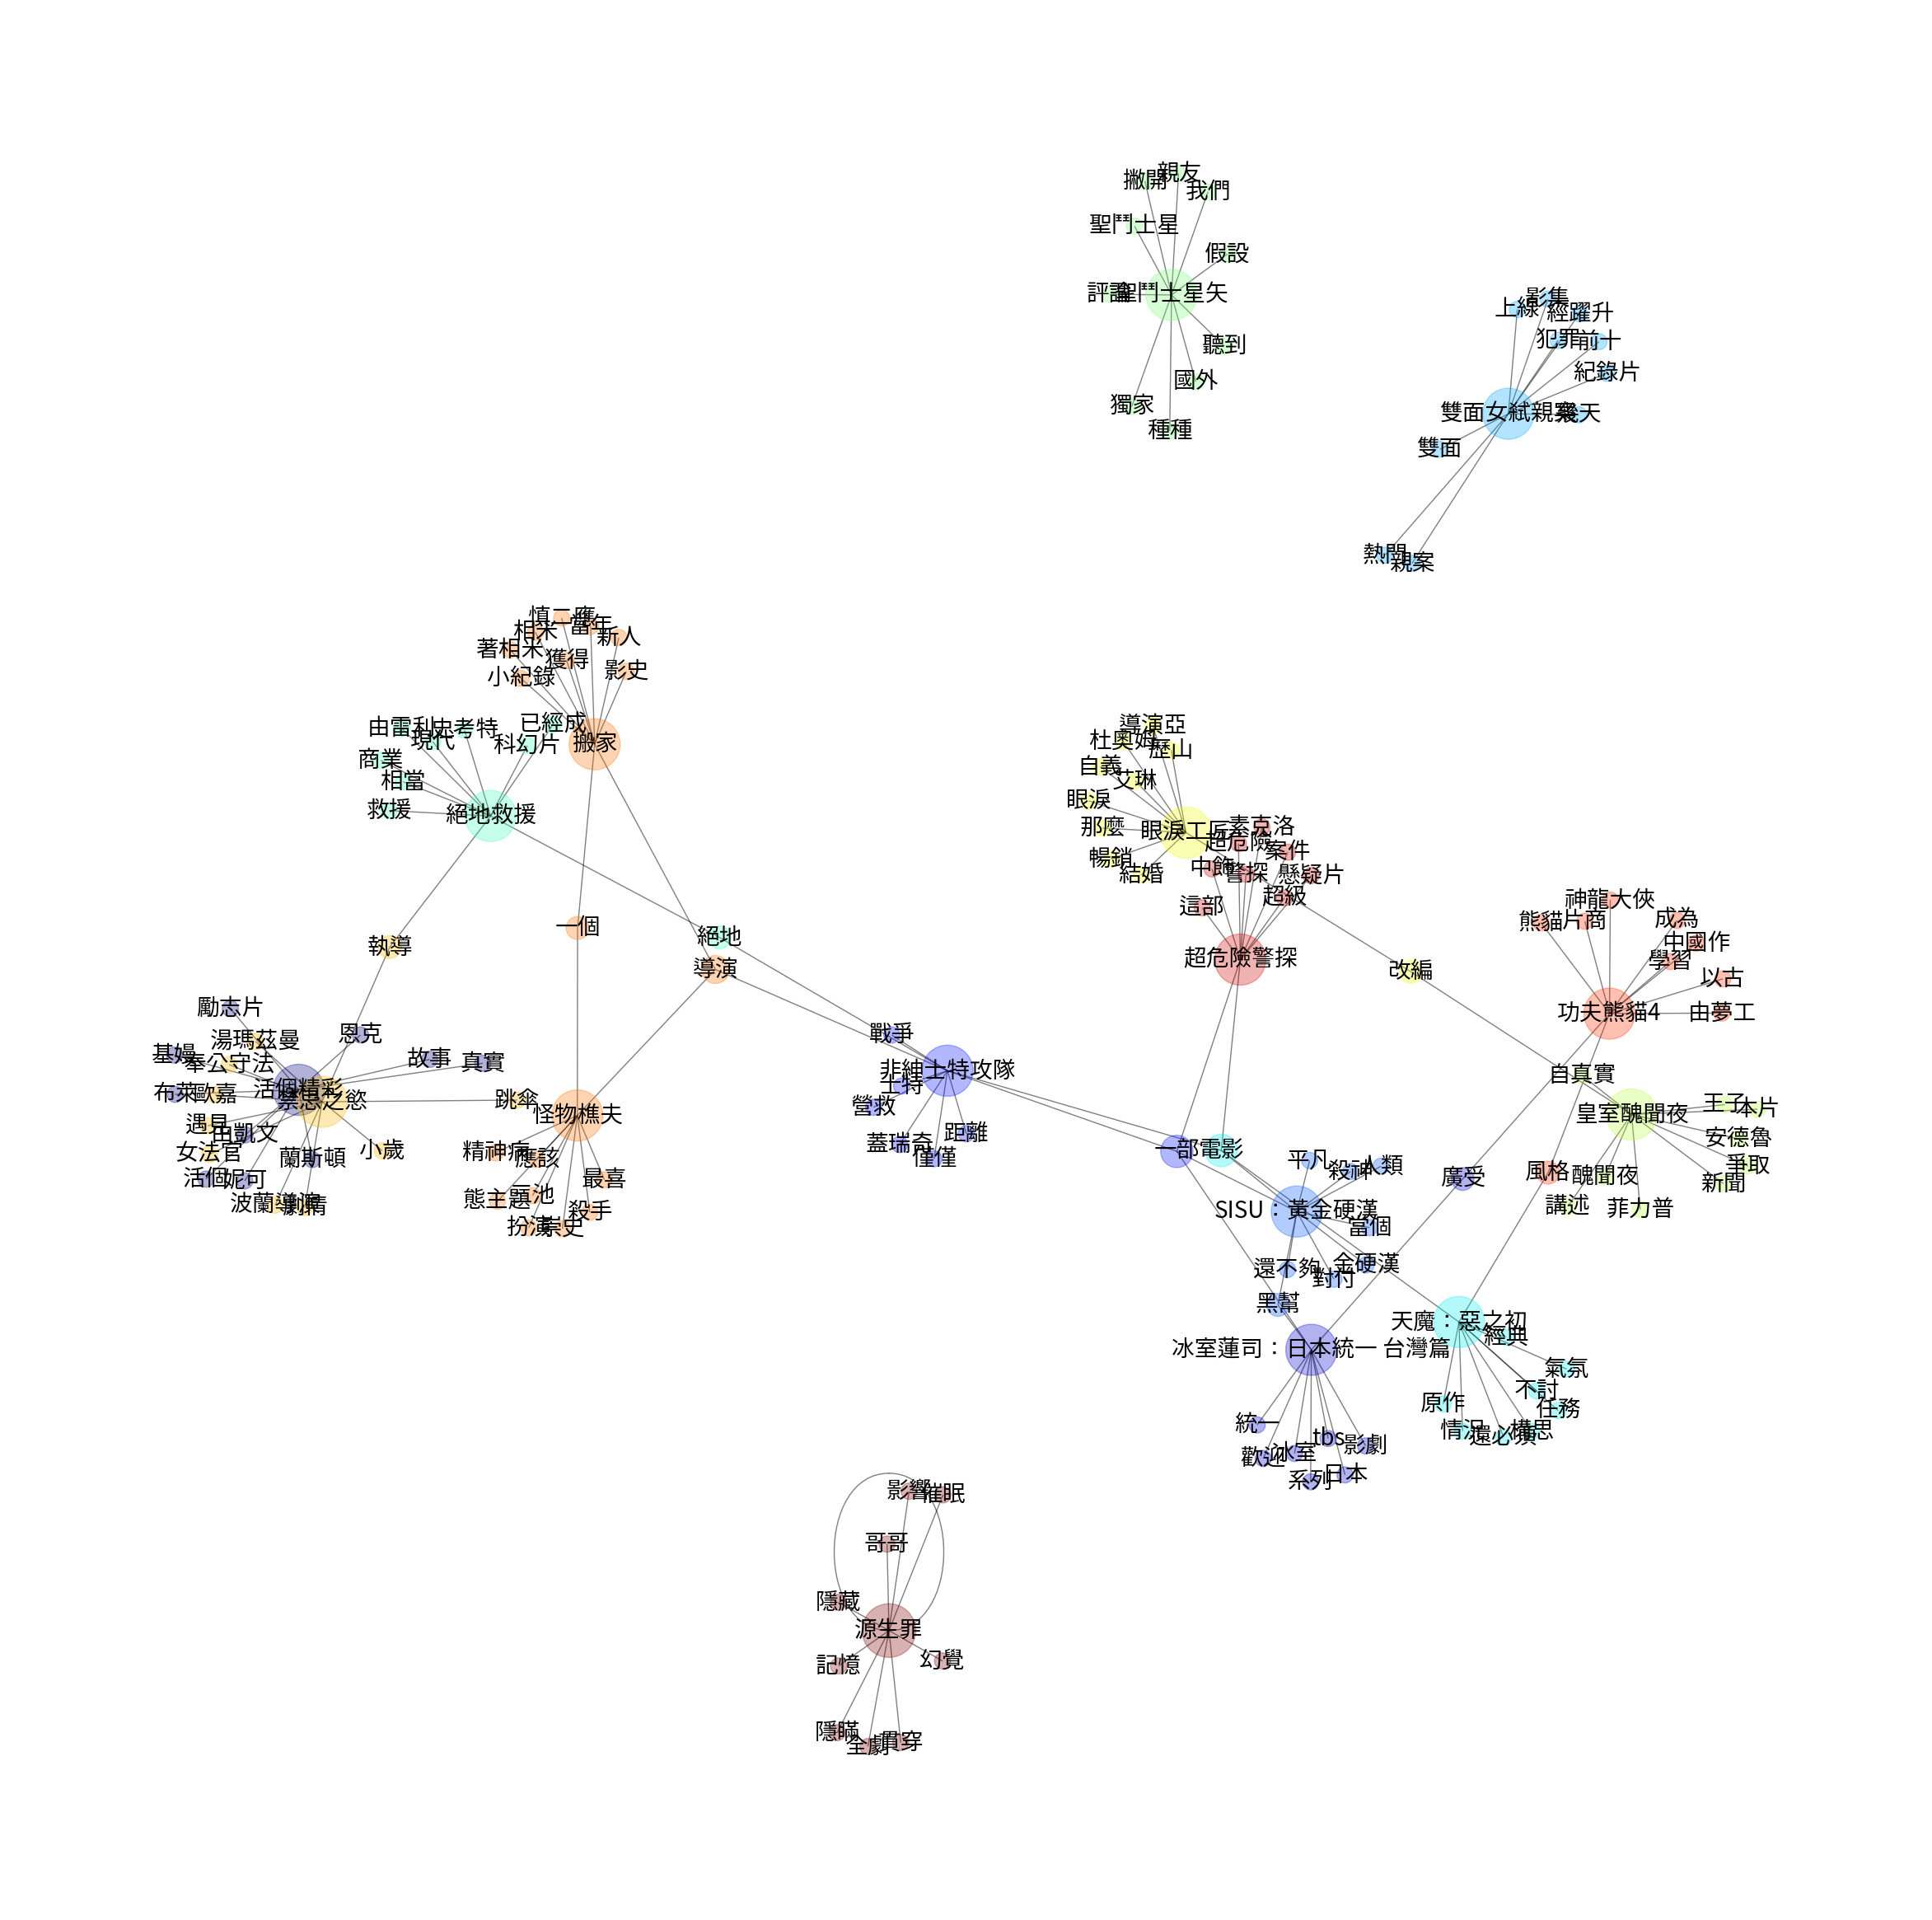

In [22]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()

# 其他LLM 嘗試

根據 HuggingFace 的 [NLP courses](https://huggingface.co/learn/nlp-course/en/chapter1/5?fw=pt) 
<br>
sequence to sequence 家族的LLM 在 summarization 的任務上表現最佳，其中他提到了以下4種

- BART- mBART
- Marian
- 
T5

我嘗試了HuggingFace 多個模型，但是發現中文進行摘要的模型已不多，加上本身硬體實在是跑不動一般的模型，過程令人沮喪

幾經篩選後，找到了此[模型](https://huggingface.co/yihsuan/mt5_chinese_small)

In [23]:
from transformers import pipeline

# 初始化 pipeline，指定模型和設備
# device=0 通常代表使用第一個 GPU，如果有多個 GPU，可以改成 1, 2, ...
pipe = pipeline("summarization", model="yihsuan/mt5_chinese_small", device=0)


In [24]:
# 從 DataFrame 中取得要摘要的文本
text_to_summarize = df['content'][0]

# 進行摘要
summary = pipe(text_to_summarize, max_length = 150, min_length = 50, length_penalty=2.0)

# 打印摘要結果
print(summary[0]['summary_text'])
print(summary)

C:\Users\micha\anaconda3\envs\webcrawling\lib\site-packages\transformers\generation\configuration_utils.py:472: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2.0` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


《活個精彩》是一部情感真摯、穩紮穩打勵志片,讓角色間互動更溫度! 《活個精彩》是一部情感真摯、穩紮穩打勵志片,讓角色間互動更溫度
[{'summary_text': '《活個精彩》是一部情感真摯、穩紮穩打勵志片,讓角色間互動更溫度! 《活個精彩》是一部情感真摯、穩紮穩打勵志片,讓角色間互動更溫度'}]


In [25]:
l_mt5 = []
for i in range(len(df['content'])):
    text_to_summarize = df['content'][i]
    sum = pipe(text_to_summarize, max_length = 150, min_length = 50, length_penalty=2.0)
    sum_text = sum[0]['summary_text']
    l_mt5.append(sum_text)

df['summarization_mt5'] = l_mt5
df['summarization_mt5']

C:\Users\micha\anaconda3\envs\webcrawling\lib\site-packages\transformers\pipelines\base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


0     《活個精彩》是一部情感真摯、穩紮穩打勵志片,讓角色間互動更溫度! 《活個精彩》是一部情感真摯...
1     日本黑道電影《冰室蓮司:日本統一 台灣篇》電影評價心得:不畏現實壓力,堅持「正確的事」,貫徹...
2     《雙面女親案》事件背後議題引人深思 警訊影像片段抽絲剝繭出真相,真相竟隱藏真相!- 青年日報...
3     《非紳士特攻隊》:《惡棍特工》與《惡棍特工》,為什麼你看不到這麼多?《非紳士特攻隊》的電影最...
4     《皇室醜聞夜》揭開真相、聲張正義的幕後推手 揭開真相、聲張正義的幕後推手 一小時的電視能改變...
5     《眼淚工匠》主角瑞吉爾被送進孤兒院,卻被送進孤兒院,卻被「愛德華」收養,卻被送進孤兒院,卻被...
6     《禁忌之慾》 歐嘉和瑪雅兩人愛上同一個男人的糾葛,為何是犯什麼罪?- 電影片名所稱的禁忌之慾...
7     《搬家》 《搬家》 為什麼《搬家》是極其優秀的兒童電影? - 青年日報 - 青年日報 - 青...
8     《功夫熊貓》系列最終章,為什麼有什麼影響?《功夫熊貓》是系列最終章嗎? 這不是情懷是什麼? ...
9     《:黃金硬漢》的演員:從車隊往前殺死,卻被挖開戰車頂,卻被挖出「黑幫」,卻被捕死,卻被捕死,...
10    《天魔》的邪惡勢力起源故事,為何卻是邪惡勢力起源? 《天魔》的「重啟續集」? 讓人看似人類,...
11    羅素克洛出演懸疑片《超危險警探》上映,為尋求真相的失憶警探,發現真相不單純,卻是個致命傷了!...
12    《源生罪》的樊雪兒又會想起什麼呢? 《源生罪》的樊雪兒又會想起什麼呢?-生活板 - 青年日報...
13    《怪物樵夫》導演三池崇史,誰能活過這場瘋狂殺戮?-電影專欄 | 常春月刊--台視文化事業股份...
14    《聖鬥士星矢》爛到好笑,你不是太愛原著,你還真不討厭這部電影,你還真不討厭!-生活板 - 青...
15    《絕地救援》是太空版的太空版,電影讓觀眾心一笑,但這片卻是太空版的《浩劫重生》,但這片卻是太...
Name: summarization_mt5, dtype: object

## 對LLM("yihsuan/mt5_chinese_small")的摘要做斷詞

In [26]:
# df['keywords_sumrz'] = df['summarization'].apply(remove_spaces)
df['keywords_sumrz_mt5'] = df['summarization_mt5'].apply(extract_keywords)
df.head(10)

,url,movie_name,content,author_name,publish_date,keywords,summarization,keywords_sumrz,summarization_mt5,keywords_sumrz_mt5
0,https://news.agentm.tw/277749/,活個精彩,《活個精彩》是一部由凱文哈特、布萊恩克蘭斯頓、妮可基嫚等人主演的勵志片，也是以真實故事為基礎...,影Joy Movie,2024-04-17,"[活個, 電影, 凱文, 精彩, 哈特, 看護, 表現, 角色, 這個, 一個]",《活個精彩》是一部由凱文哈特、布萊恩克蘭斯頓、妮可基嫚等人主演的勵志片，也是以真實故事為基礎...,"[恩克, 布萊, 蘭斯頓, 妮可, 故事, 活個, 由凱文, 基嫚, 勵志片, 真實]","《活個精彩》是一部情感真摯、穩紮穩打勵志片,讓角色間互動更溫度! 《活個精彩》是一部情感真摯...","[活個, 真摯, 打勵, 志片, 互動, 溫度, 精彩, 情感, 角色, 一部]"
1,https://news.agentm.tw/277359/,冰室蓮司：日本統一 台灣篇,《日本統一》為日本廣受歡迎的長壽黑幫影劇系列作，自 年推出至今累積作品超過 部，不只連續...,電影神搜,2024-04-16,"[台灣, 冰室, 統一, 本片, 日本, 台灣篇, 觀眾, 蓮司, 電影, 黑道]",《日本統一》為日本廣受歡迎的長壽黑幫影劇系列作，自年推出至今累積作品超過部，不只連續劇一部接...,"[統一, tbs, 冰室, 日本, 系列, 一部, 廣受, 歡迎, 黑幫, 影劇]","日本黑道電影《冰室蓮司:日本統一 台灣篇》電影評價心得:不畏現實壓力,堅持「正確的事」,貫徹...","[電影, 貫徹, 戲裡, 戲外, 俠義之風, 冰室, 蓮司, 統一, 台灣篇, 評價]"
2,https://news.agentm.tw/277642/,雙面女弒親案,出品很多犯罪紀錄片、犯罪影集等等，往往都是排行榜上的亮眼作品，於 月 日上線的紀錄片《雙...,愛看電影的波妞,2024-04-16,"[珍妮佛, 雙面, 親案, 紀錄片, 犯罪, 事件, 過程, 真相, 父母, 抽絲]",出品很多犯罪紀錄片、犯罪影集等等，往往都是排行榜上的亮眼作品，於月日上線的紀錄片《雙面女弑親...,"[紀錄片, 雙面, 親案, 犯罪, 影集, 上線, 幾天, 經躍升, 熱門, 前十]","《雙面女親案》事件背後議題引人深思 警訊影像片段抽絲剝繭出真相,真相竟隱藏真相!- 青年日報...","[真相, 日報, 青年, 引人深思, 雙面, 親案, 背後議題, 警訊, 抽絲, 剝繭出]"
3,https://news.agentm.tw/277429/,非紳士特攻隊,距離《絕地營救》僅僅一年，蓋瑞奇導演又帶著新片《非紳士特攻隊》回來了。這是一部諜報電影、劫盜...,龍貓大王通信,2024-04-16,"[士特, 電影, 非紳, 攻隊, 蓋瑞奇, 他們, 納粹, 任務, 戰爭, 英國]",距離《絕地營救》僅僅一年，蓋瑞奇導演又帶著新片《非紳士特攻隊》回來了。這是一部諜報電影、劫盜...,"[電影, 絕地, 營救, 戰爭, 士特, 一部, 距離, 僅僅, 蓋瑞奇, 導演]","《非紳士特攻隊》:《惡棍特工》與《惡棍特工》,為什麼你看不到這麼多?《非紳士特攻隊》的電影最...","[士特, 非紳, 攻隊, 惡棍, 電影, 特工, 什麼, 這麼, 蒼野之鷹, 看不到]"
4,https://news.agentm.tw/277536/,皇室醜聞夜,改編自真實事件的《皇室醜聞夜》講述 《新聞之夜》如何爭取到與安德魯王子的獨家採訪，揭露安德魯...,艾米希莉 Amesily,2024-04-15,"[醜聞夜, 皇室, 安德魯, 新聞, 王子, 真實, 訪談, 事件, 採訪, 節目]",改編自真實事件的《皇室醜聞夜》講述《新聞之夜》如何爭取到與安德魯王子的獨家採訪，揭露安德魯王...,"[新聞, 安德魯, 王子, 菲力普, 本片, 改編, 自真實, 醜聞夜, 講述, 爭取]",《皇室醜聞夜》揭開真相、聲張正義的幕後推手 揭開真相、聲張正義的幕後推手 一小時的電視能改變...,"[揭開, 聲張, 正義的, 推手, 真相, 醜聞夜, 電視能, 改變, 電視台, 皇室]"
5,https://news.agentm.tw/277463/,眼淚工匠,《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋...,艾米希莉 Amesily,2024-04-12,"[眼淚, 工匠, 瑞吉爾, 暮光, 之城, 劇情, 愛情, 創傷, 擁有, 孤兒院]",《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋...,"[眼淚, 改編, 自義, 艾琳, 杜奧姆, 暢銷, 結婚, 那麼, 導演亞, 歷山]","《眼淚工匠》主角瑞吉爾被送進孤兒院,卻被送進孤兒院,卻被「愛德華」收養,卻被送進孤兒院,卻被...","[進孤兒院, 眼淚, 瑞吉爾, 愛德華, 收養, 主角, 工匠]"
6,https://news.agentm.tw/277440/,禁忌之慾,由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,人文電影的追尋,2024-04-12,"[克斯, 兩人, 愛的, 電影, 歐嘉, 瑪雅, 職業, 我們, 他們, 設定]",由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,"[女法官, 奉公守法, 波蘭導演, 湯瑪茲曼, 執導, 劇情, 歐嘉, 遇見, 小歲, 跳傘]","《禁忌之慾》 歐嘉和瑪雅兩人愛上同一個男人的糾葛,為何是犯什麼罪?- 電影片名所稱的禁忌之慾...","[禁忌, 歐嘉和瑪雅, 兩人, 愛上, 糾葛, 為何, 犯什麼, 名所稱, 電影名, 所稱]"
7,https://news.agentm.tw/277236/,搬家,導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,龍貓大王通信,2024-04-10,"[蓮子, 搬家, 電影, 這個, 相米, 離婚, 智子, 導演, 因為, 一個]",導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,"[導演, 新人, 相米, 慎二應, 影史, 一個, 小紀錄, 獲得, 當年, 著相米]",《搬家》 《搬家》 為什麼《搬家》是極其優秀的兒童電影? - 青年日報 - 青年日報 - 青...,"[日報, 青年, 搬家, 什麼, 極其, 優秀, 兒童, 電影]"
8,https://news.agentm.tw/277248/,功夫熊貓4,年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習武功成為神...,影Joy Movie,2024-04-10,"[阿波, 熊貓, 功夫, 反派, 並且, 三部曲, 生涯, 第二集, 神龍大俠, 還是]",年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習武功成為神...,"[熊貓, 片商, 由夢工, 以古, 中國作, 學習, 成為, 神龍大俠, 風格, 廣受]","《功夫熊貓》系列最終章,為什麼有什麼影響?《功夫熊貓》是系列最終章嗎? 這不是情懷是什麼? ...","[什麼, 情懷, 熊貓, 終章, 功夫, 系列, 影響, 不是]"
9,https://news.agentm.tw/277226/,SISU：黃金硬漢,如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在 上架的芬蘭電...,Thelma 電影狂花,2024-04-10,"[金硬漢, 電影, 本片, 科夏伊, 一個, 主角, 殺神, 這類, 設計, 劇情]",如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在上架的芬蘭電影《...,"[電影, 金硬漢, 人類, 平凡, 一部, 當個, 殺神, 對付, 黑幫, 還不夠]","《:黃金硬漢》的演員:從車隊往前殺死,卻被挖開戰車頂,卻被挖出「黑幫」,卻被捕死,卻被捕死,...","[被捕, 金硬漢, 演員, 車隊, 開戰車, 黑幫, 挖出, 往前]"


## 對LLM("yihsuan/mt5_chinese_small")摘要斷詞繪製網絡關聯圖

C:\Users\micha\anaconda3\envs\webcrawling\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


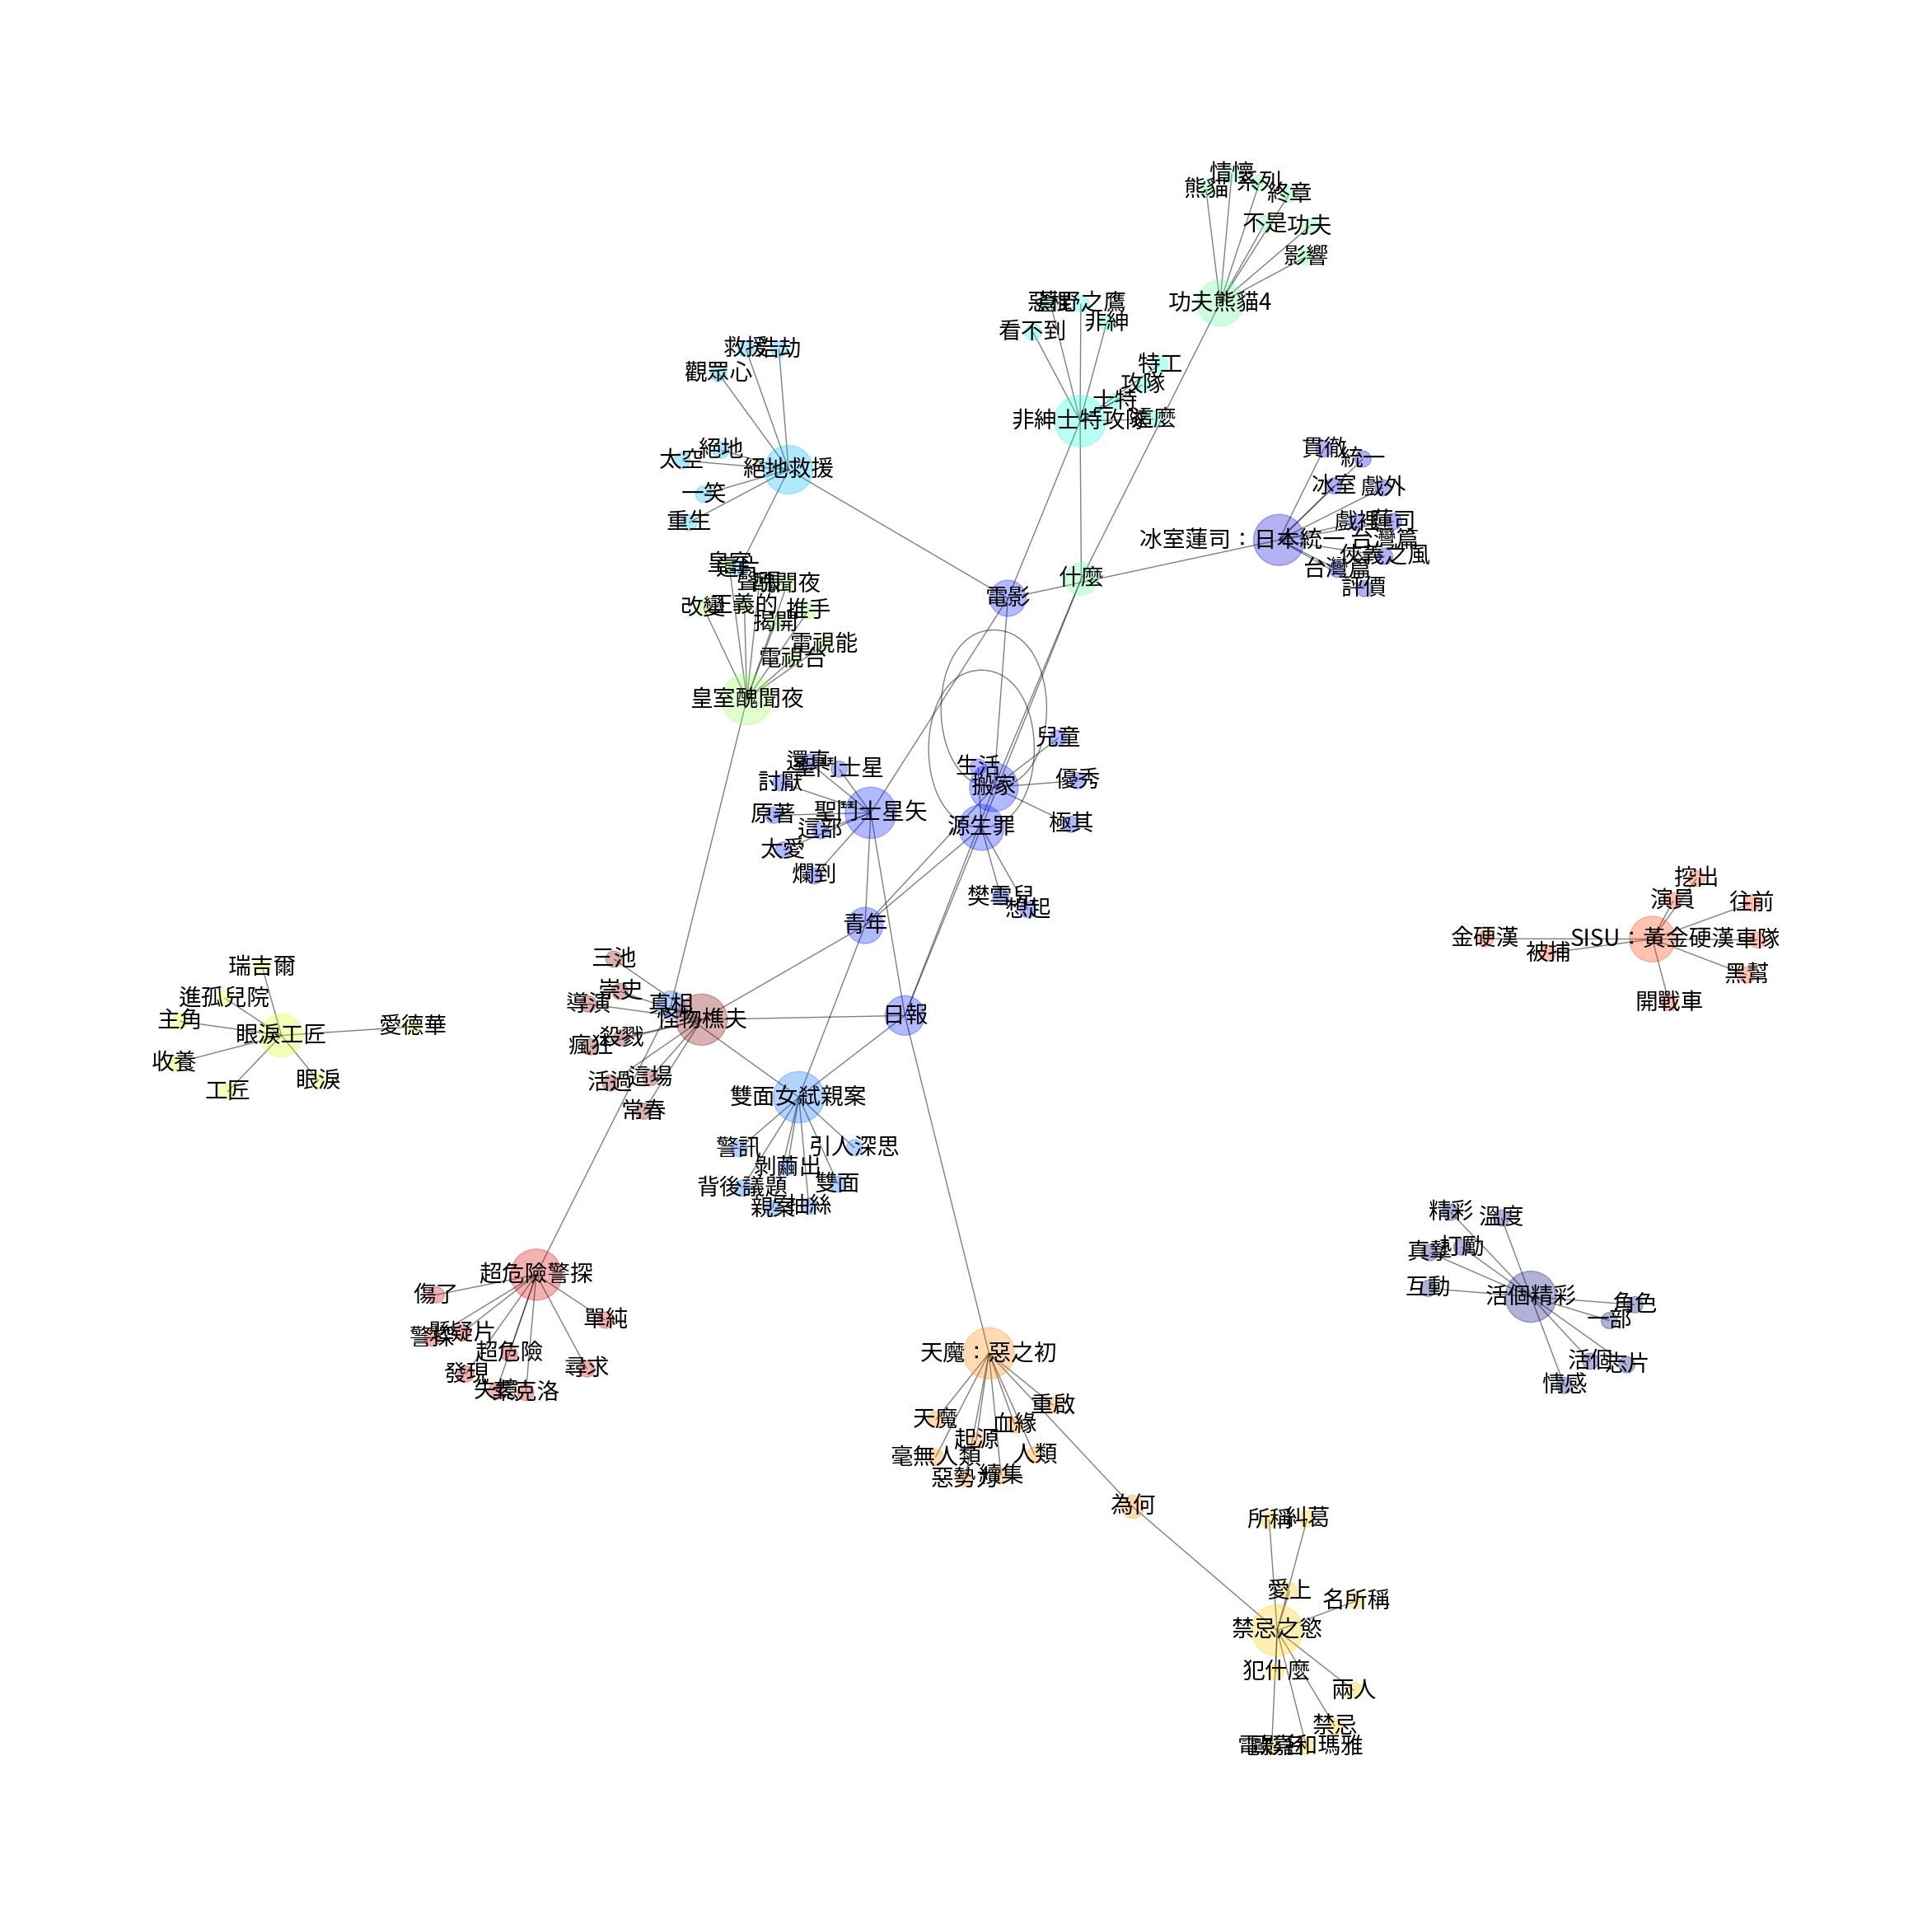

In [27]:
G = nx.Graph()

for index, row in df.iterrows():
    movie_name = row['movie_name']
    keywords_sumrz = row['keywords_sumrz_mt5']

    G.add_node(movie_name, type='author')

    for keyword in keywords_sumrz:
        G.add_node(keyword, type='keyword')
        G.add_edge(movie_name, keyword)

partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()

# 繪製詞雲 將三者(原始影評、LLM(BERT)、LLM(MT5) ) 進行比較

In [28]:
# !pip install wordcloud matplotlib
# !pip install mpltw

### 原始影評

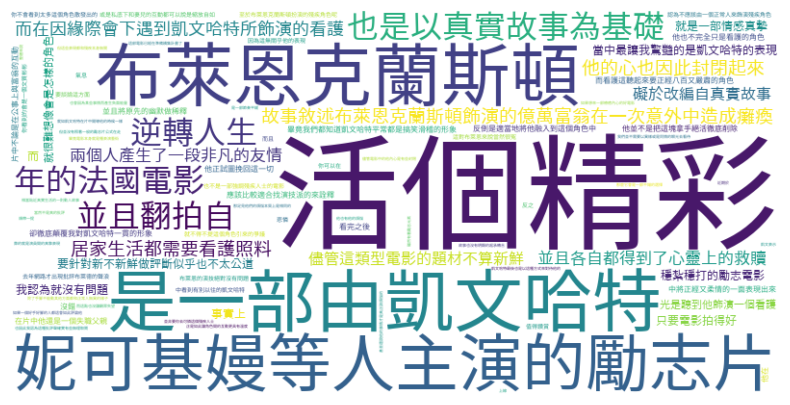

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import mpltw

# 指定中文支持的字體路徑
font_path = 'TaipeiSansTCBeta-Regular.ttf'  # 替換為您的字體文件路徑
# 文本數據
text = df['content'][0]

# 創建 WordCloud 對象
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 顯示詞雲圖像
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不顯示軸線和標籤
plt.show()


### LLM(BERT)摘要

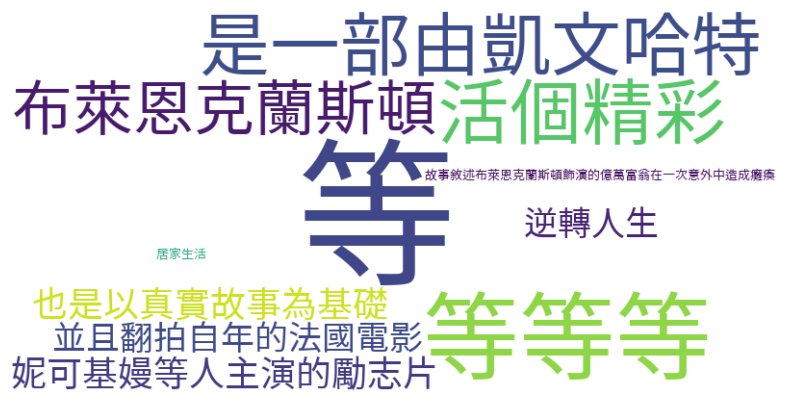

In [30]:
text = df['summarization'][0]

# 創建 WordCloud 對象
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 顯示詞雲圖像
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不顯示軸線和標籤
plt.show()


### LLM(MT5)摘要

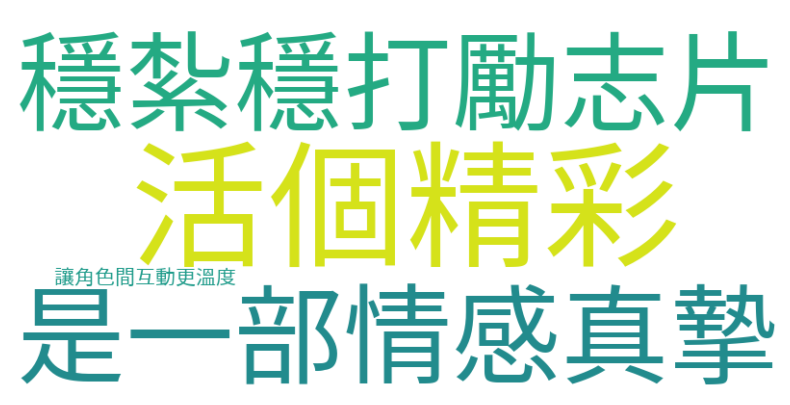

In [31]:
text = df['summarization_mt5'][0]

# 創建 WordCloud 對象
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 顯示詞雲圖像
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不顯示軸線和標籤
plt.show()


# 結論

在此任務上

MT5 的摘要效果比 BERT 好一些

In [32]:
## 清除顯存
# import torch
# torch.cuda.empty_cache()